#Simple and Multiple linear regression

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Importing the dataset
data = pd.read_csv("Advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## TV Simple Linear Model

In [3]:
x = data.iloc[:,0].values
print(x)
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

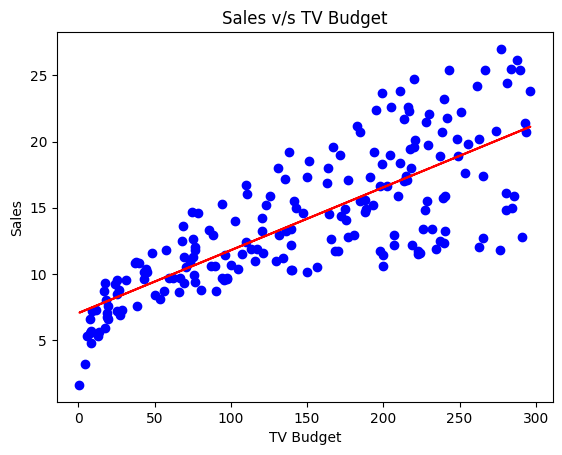

In [4]:
# create an empty linear regression model 
tv_model = LinearRegression()

# to create the model, we use fit(x,y)
tv_model.fit(x,y)

y_pred = tv_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,tv_model.predict(x),color = 'r')
plt.title('Sales v/s TV Budget')
plt.ylabel('Sales')
plt.xlabel('TV Budget')
plt.show()


## Radio Simple Linear Model

In [10]:
x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

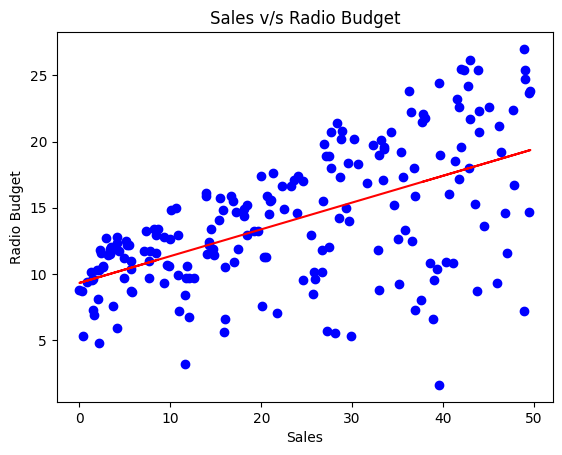

In [11]:
# create an empty linear regression model 
radio_model = LinearRegression()

# to create the model, we use fit(x,y)
radio_model.fit(x,y)

y_pred = radio_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,radio_model.predict(x),color = 'r')
plt.title('Sales v/s Radio Budget')
plt.xlabel('Sales')
plt.ylabel('Radio Budget')
plt.show()


In [12]:
# The coefficients
print('Coefficients: \n', radio_model.coef_)

Coefficients: 
 [[0.20249578]]


## Newspaper Simple Linear model

In [13]:
x = data.iloc[:,2].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

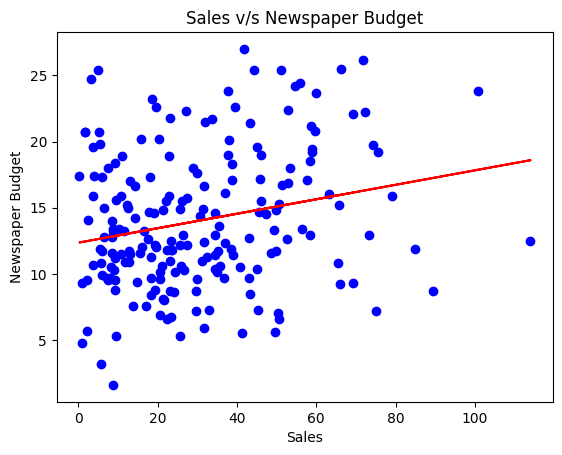

In [14]:
# create an empty linear regression model 
newspaper_model = LinearRegression()

# to create the model, we use fit(x,y)
newspaper_model.fit(x,y)

y_pred = newspaper_model.predict(x)
plt.scatter(x,y,color = 'b')
plt.plot(x,newspaper_model.predict(x),color = 'r')
plt.title('Sales v/s Newspaper Budget')
plt.xlabel('Sales')
plt.ylabel('Newspaper Budget')
plt.show()


In [15]:
# The coefficients
print('Coefficients: \n', newspaper_model.coef_)

Coefficients: 
 [[0.0546931]]


## Multiple Linear Regression

In [16]:
X = data.iloc[:,[1,2,3]].values
X[1:4]

array([[39.3, 45.1, 10.4],
       [45.9, 69.3,  9.3],
       [41.3, 58.5, 18.5]])

In [17]:

y = data.iloc[:,0].values
y = y.reshape(-1, 1)
X = X.reshape(-1, 3)

# create an empty linear regression model like below and give it a good variable name
advertising_model = LinearRegression()

# to create the model, we use fit(x,y)
advertising_model.fit(X,y)


print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [-33.28853795]
Coefficients: 
 [[-3.44959312  0.04503377 18.48503551]]


## Training and test samples

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)



Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


Using a 0.25 test size split our data of 200 items into a training set of 150 observations and three columns, and a test set of 50 observations. 

We can use this to evaluate our model.


### Now we’ll fit the model on the training data:


In [20]:
# fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [21]:
predictions[0:5]


array([[101.04423689],
       [ 69.28575925],
       [ 90.07823623],
       [153.77376482],
       [192.44012314]])

In [22]:
## Plot the errors
residuals = y_test-predictions
residuals = np.squeeze(residuals)

#ensure only +tive values are taken for yerr
res_absolute = np.abs(residuals)
res_absolute = np.squeeze(res_absolute)

# Why did this take me so long to figure out?

<ErrorbarContainer object of 3 artists>

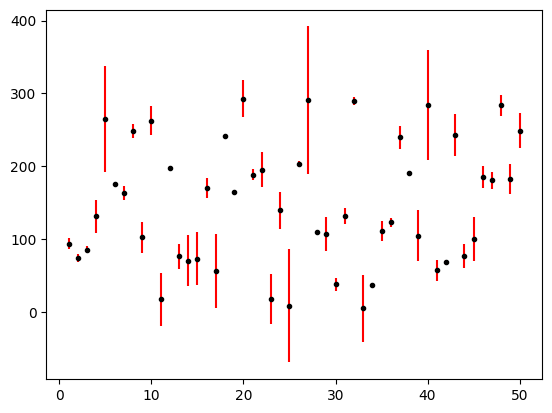

In [23]:
plt.errorbar(range(1,51), np.squeeze(y_test), yerr=res_absolute, fmt='.k', ecolor="red")

The red lines indicate the error of the prediction from the actual observations. 

Sklearn's LinearRegression provides the R squared score for its models:

In [24]:
print ("Score:", model.score(X_test, y_test))


Score: 0.8663846899873541


This score is quite close to 1, which suggests that our model fits our observations quite well.